In [1]:
import tensorflow as tf

tf.get_logger().setLevel("ERROR")

try:
    gpus = tf.config.experimental.list_physical_devices('GPU')
    tf.config.experimental.set_virtual_device_configuration(
    gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=(1024 * 1))])
    print(gpus[0])
except IndexError:
    print("gpu not appearing")

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


True

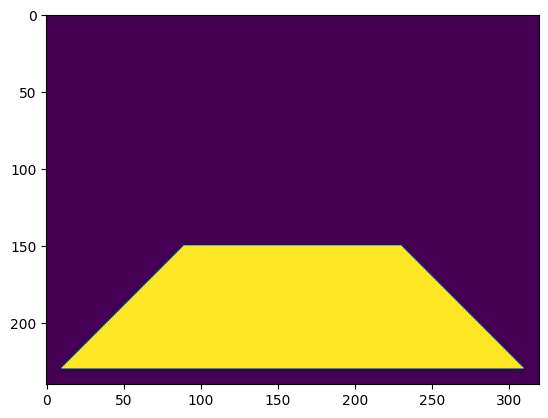

In [2]:
from generateAttentionArea import createAttetionArea
import matplotlib.pyplot as plt
import cv2
from glob import glob
import numpy as np

attetionArea = createAttetionArea((240, 320), top=150, bottom=230)
plt.imshow(attetionArea)
cv2.imwrite("attentionArea.png", attetionArea[150:231, :])

In [3]:
import matplotlib.pyplot as plt
from glob import glob
import cv2

In [4]:
imgs = sorted(glob("images/frame*"))
masks = sorted(glob("images/mask*"))

In [5]:
idx = 21
img = cv2.imread(imgs[idx], cv2.IMREAD_COLOR).astype(np.uint8)
mask = cv2.imread(masks[idx], cv2.IMREAD_GRAYSCALE).astype(np.uint8)

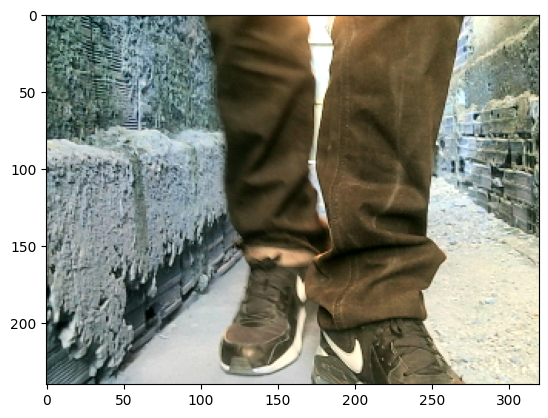

In [6]:
plt.imshow(img)


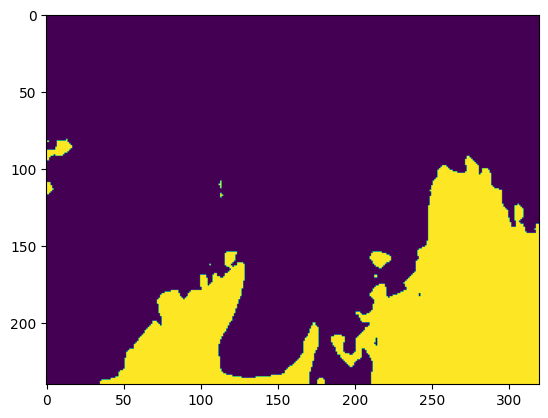

In [7]:
plt.imshow(mask)

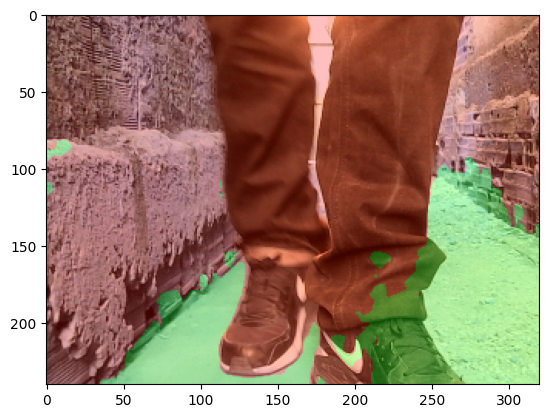

In [13]:
def maskToColor(mask):
    layer_1 = np.array(mask == 0) * 255
    layer_2 = np.array(mask == 1) * 255
    layer_3 = np.array(mask == 2) * 255
    return np.stack([layer_1, layer_2, layer_3], axis=-1).astype(np.uint8)

plt.imshow(cv2.addWeighted(img, 0.75, maskToColor(mask), 0.25, 0))

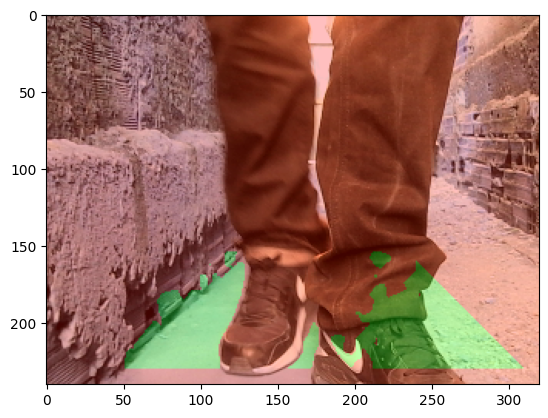

In [14]:
attetionArea = createAttetionArea((240, 320), top=150, bottom=230)
plt.imshow(cv2.addWeighted(img, 0.75, maskToColor(mask*attetionArea), 0.25, 0))

In [15]:
(mask*attetionArea).sum(), attetionArea.sum()

(7814, 17680)

In [16]:
import numpy as np
np.unique(mask)

array([0, 1], dtype=uint8)

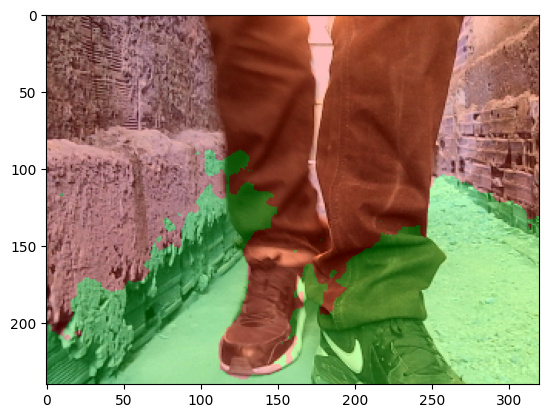

In [17]:
from aaah import run
maskTest = run("VERTICAL_FLIP_False.tflite", img, normalize=1)
plt.imshow(cv2.addWeighted(img, 0.75, maskToColor(maskTest), 0.25, 0))

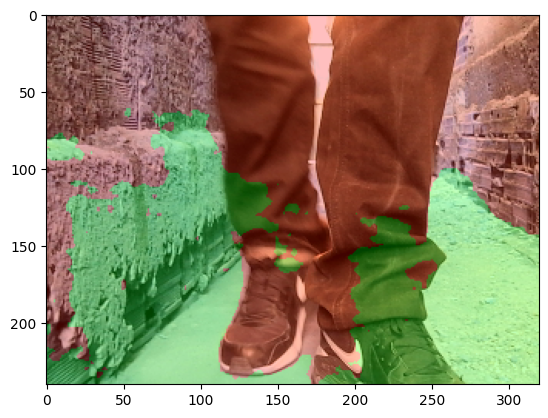

In [19]:
maskTest = run("VERTICAL_FLIP_True.tflite", img)
plt.imshow(cv2.addWeighted(img, 0.75, maskToColor(maskTest), 0.25, 0))